# Clone file code

In [1]:
!git clone https://github.com/duongstudent/CV_Vinbigdata.git

Cloning into 'CV_Vinbigdata'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (66/66), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 66 (delta 7), reused 66 (delta 7), pack-reused 0
Unpacking objects: 100% (66/66), done.


In [2]:
%cd CV_Vinbigdata/

/content/CV_Vinbigdata


# Install thư viện

In [3]:
!pip install dominate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dowload model

### Nếu lỗi khi bạn chạy trên colab là do section chưa load xong, check đường dẫn folder "/content/CV_Vinbigdata/checkpoints/colon2depth_512p" và chạy lại

In [8]:
!gdown 1-jk4ddBheo1X3t12vKCPBxxubaOUO8S_  -O /content/CV_Vinbigdata/checkpoints/colon2depth_512p/80_net_D.pth
!gdown 13HXlby3-u9JQilWNnPWUSLnLJsoRNCxH  -O /content/CV_Vinbigdata/checkpoints/colon2depth_512p/80_net_G.pth

Downloading...
From: https://drive.google.com/uc?id=1-jk4ddBheo1X3t12vKCPBxxubaOUO8S_
To: /content/CV_Vinbigdata/checkpoints/colon2depth_512p/80_net_D.pth
100% 22.1M/22.1M [00:00<00:00, 160MB/s]
Downloading...
From: https://drive.google.com/uc?id=13HXlby3-u9JQilWNnPWUSLnLJsoRNCxH
To: /content/CV_Vinbigdata/checkpoints/colon2depth_512p/80_net_G.pth
100% 730M/730M [00:10<00:00, 71.7MB/s]


# Chạy test



### Dữ liệu trong folder "/content/CV_Vinbigdata/data_sample"
### Predict trong folder "/content/CV_Vinbigdata/data_sample/data_sample"

In [9]:
!python ustc_test.py --name colon2depth_512p --no_instance --label_nc 0 --which_epoch 80

------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: /content/CV_Vinbigdata/checkpoints
cluster_path: features_clustered_010.npy
data_type: 32
dataroot: /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/
display_winsize: 512
engine: None
export_onnx: None
feat_num: 3
fineSize: 256
fp16: False
gpu_ids: [0]
how_many: 50
input_nc: 3
instance_feat: False
isTrain: False
label_feat: False
label_nc: 0
loadSize: 512
load_features: False
local_rank: 0
max_dataset_size: inf
model: pix2pixHD
nThreads: 2
n_blocks_global: 9
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 4
n_local_enhancers: 1
name: colon2depth_512p
nef: 16
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
no_instance: True
norm: instance
ntest: inf
onnx: None
output_nc: 1
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: False
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
which_epoch: 80
-----------

# Xem kết quả chạy

In [ ]:
import glob
import cv2
import matplotlib.pyplot as plt
data_test = glob.glob('/content/CV_Vinbigdata/data_sample/*.png')
len(data_test)

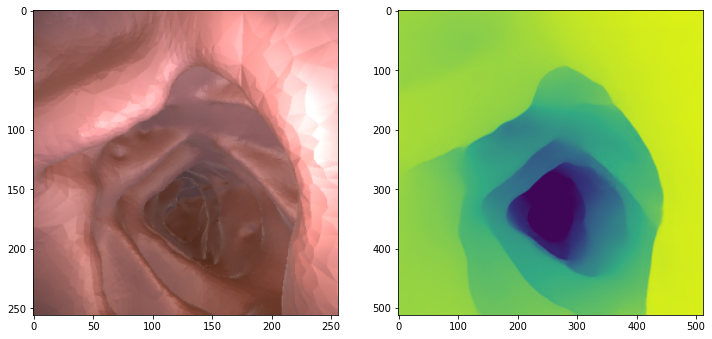

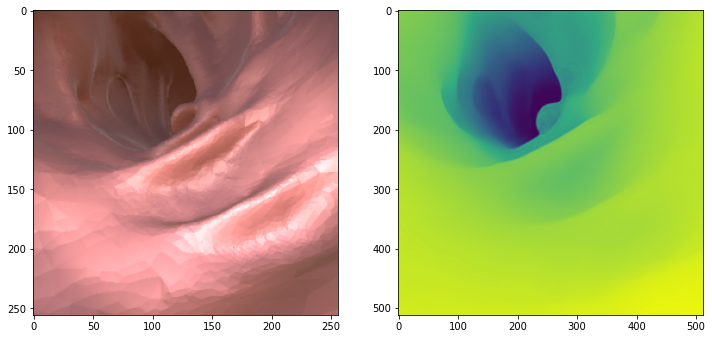

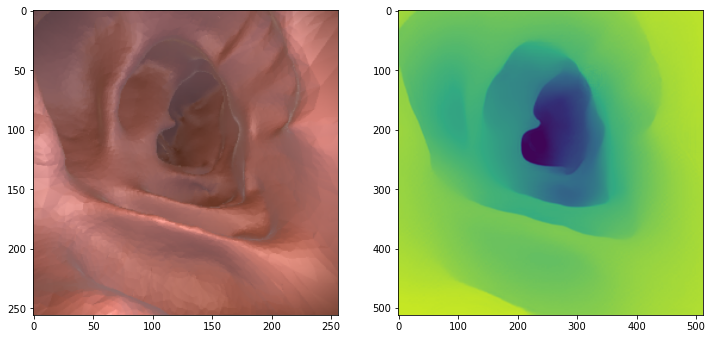

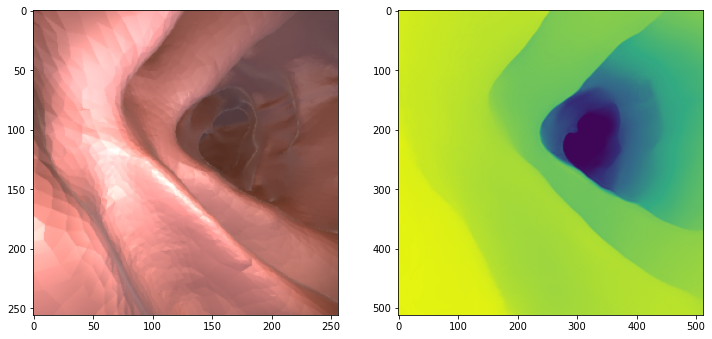

In [13]:

for i in data_test:
  predict_path = i.replace("data_sample","data_sample/data_sample")
  img = cv2.imread(i)
  predict_img = cv2.imread(predict_path)
  plt.figure(figsize=(12, 12))
  plt.subplot(1, 2, 1)
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.subplot(1,2,2)
  plt.imshow(cv2.cvtColor(predict_img, cv2.COLOR_BGR2RGB))
  plt.show()